In [85]:
#%pip install seaborn

## Primary Hypothesis
We will beilive that those in a stem major get paid considerably more than the others

## Data Collection

The [dataset](https://collegescorecard.ed.gov/data/) contains information on schools and their earnings per degree

We are using the file shown below. it contains many different fields, but we are using the below ones, but many we are throwing away

In [49]:
data_file = '/Users/oniichan/Downloads/data/Most-Recent-Cohorts-Field-of-Study.csv'

In [50]:
# load data into df
import pandas as pd
df = pd.read_csv(data_file)
display(df.head())

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,BBRR4_FED_COMP_N,BBRR4_FED_COMP_DFLT,BBRR4_FED_COMP_DLNQ,BBRR4_FED_COMP_FBR,BBRR4_FED_COMP_DFR,BBRR4_FED_COMP_NOPROG,BBRR4_FED_COMP_MAKEPROG,BBRR4_FED_COMP_PAIDINFULL,BBRR4_FED_COMP_DISCHARGE,DISTANCE
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,6.0,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,8.0,...,12,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1


In [51]:
# get all unique values in CIPDESC and how many times they appear
cipdesc = df['CIPDESC'].value_counts()
# sort the df by name of the CIPDESC
cipdesc = cipdesc.sort_index()
# dont use the ...
pd.set_option('display.max_rows', None)
# print all values with an index number in a fancy dataframe
display(cipdesc.reset_index())
# me: thank you
# ai: i love you
# set the display back to normal
pd.reset_option('display.max_rows')

,CIPDESC,count
0,Accounting and Computer Science.,25
1,Accounting and Related Services.,4407
2,Advanced/Graduate Dentistry and Oral Sciences.,169
3,"Aerospace, Aeronautical and Astronautical Engi...",228
4,"African Languages, Literatures, and Linguistics.",6
5,Agricultural Business and Management.,622
6,Agricultural Engineering.,129
7,Agricultural Mechanization.,129
8,Agricultural Production Operations.,480
9,Agricultural Public Services.,79


## Data Harvesting
We are combining the many different degrees into more normal fields

These are going to make doing stuff easier

we also keep only some of the fields
- CIDCODE: code for major
- CIDDESC: complex major name
- CREDDESC: degree class
- Major: generic major
- EARN_MDN_4YR: median pay for students at that school after 4 years
  
We also remove any rows that do not have a number for the earnings

After all this, we get ~5900 samples

In [52]:
# get all rows wth Creddesc = 'bachelors'
keeps_agri = [ 'Agricultural Business and Management.', 'Agricultural Economics.', 'Agricultural Mechanization.', 'Agricultural Production Operations.', 'Agricultural Public Services.', 'Agricultural and Domestic Animal Services.', 'Agriculture, General.', 'Agronomy and Crop Science.', 'Animal Sciences.', 'Food Science.', 'Forestry.', 'Horticulture.', 'Natural Resources Management.', 'Plant Sciences.', 'Soil Science.', 'Wildlife and Wildlands Science and Management.' ]
keeps_eng = [ 'Aerospace, Aeronautical and Astronautical/Space Engineering.', 'Agricultural Engineering.', 'Architectural Engineering.', 'Biochemical Engineering.', 'Biological/Biosystems Engineering.', 'Biomedical/Medical Engineering.', 'Chemical Engineering.', 'Civil Engineering.', 'Computer Engineering.', 'Construction Engineering.', 'Electrical, Electronics and Communications Engineering.', 'Engineering Mechanics.', 'Engineering Physics.', 'Engineering Science.', 'Engineering, General.', 'Environmental/Environmental Health Engineering.', 'Geological/Geophysical Engineering.', 'Industrial Engineering.', 'Manufacturing Engineering.', 'Materials Engineering.', 'Mechanical Engineering.', 'Metallurgical Engineering.', 'Mining and Mineral Engineering.', 'Naval Architecture and Marine Engineering.', 'Nuclear Engineering.', 'Ocean Engineering.', 'Petroleum Engineering.', 'Systems Engineering.', 'Textile Sciences and Engineering.' ]
keeps_cs = [ 'Computer and Information Sciences, General.', 'Computer Programming.', 'Computer Science.', 'Computer Software and Media Applications.', 'Computer Systems Analysis.', 'Computer Systems Networking and Telecommunications.', 'Information Science/Studies.', 'Information Technology.', 'Web Page, Digital/Multimedia and Information Resources Design.' ]
keeps_psy = [ 'Clinical, Counseling and Applied Psychology.', 'Cognitive Psychology and Psycholinguistics.', 'Community Psychology.', 'Counseling Psychology.', 'Developmental and Child Psychology.', 'Educational Psychology.', 'Experimental Psychology.', 'Industrial and Organizational Psychology.', 'Personality Psychology.', 'Physiological Psychology/Psychobiology.', 'Psychology, General.', 'Psychometrics and Quantitative Psychology.', 'School Psychology.', 'Social Psychology.' ]

keeps = [ 'Accounting and Related Services.', *keeps_agri, *keeps_eng, *keeps_cs, *keeps_psy ]

keeps_deg = ['Bachelor\'s Degree', 'Master\'s Degree', 'Doctoral Degree']

df_sample = df[df['CREDDESC'].isin(keeps_deg)]
df_sample = df_sample[df_sample['CIPDESC'].isin(keeps)]
display(df_sample.head())
# print number of rows
print(df_sample.shape[0])

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,BBRR4_FED_COMP_N,BBRR4_FED_COMP_DFLT,BBRR4_FED_COMP_DLNQ,BBRR4_FED_COMP_FBR,BBRR4_FED_COMP_DFR,BBRR4_FED_COMP_NOPROG,BBRR4_FED_COMP_MAKEPROG,BBRR4_FED_COMP_PAIDINFULL,BBRR4_FED_COMP_DISCHARGE,DISTANCE
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,6.0,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1
6,100654.0,1002,Alabama A & M University,Public,1,111,Plant Sciences.,3,Bachelor's Degree,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0
10,100654.0,1002,Alabama A & M University,Public,1,305,Forestry.,3,Bachelor's Degree,8.0,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1


17196


In [72]:
df_formatted = df_sample

# add a column for the major
for index, row in df_formatted.iterrows():
    if row['CIPDESC'] in keeps_agri:
        df_formatted.at[index, 'Major'] = 'Agriculture'
    elif row['CIPDESC'] in keeps_eng:
        df_formatted.at[index, 'Major'] = 'Engineering'
    elif row['CIPDESC'] in keeps_cs:
        df_formatted.at[index, 'Major'] = 'Computer Science'
    elif row['CIPDESC'] in keeps_psy:
        df_formatted.at[index, 'Major'] = 'Psychology'
    else:
        df_formatted.at[index, 'Major'] = 'Other'

# only show rows with EARN_MDN_4YR as a number
df_formatted = df_formatted[df_formatted['EARN_MDN_4YR'].apply(lambda x: str(x).replace('.', '').isdigit())]
# convert EARN_MDN_4YR to a number
df_formatted['EARN_MDN_4YR'] = pd.to_numeric(df_formatted['EARN_MDN_4YR'])

# remove columns that are not needed (anything but CIPCODE, CIPDESC, CREDDESC, Major, EARN_MDN_4YR)
df_formatted = df_formatted[['CIPCODE', 'CIPDESC', 'CREDDESC', 'Major', 'EARN_MDN_4YR']]

display(df_formatted.head())
print(len(df_formatted))

/var/folders/8v/kyhpjx6d3y1b7dp0twz_83sw0000gn/T/ipykernel_66499/773435041.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_formatted['EARN_MDN_4YR'] = pd.to_numeric(df_formatted['EARN_MDN_4YR'])


,CIPCODE,CIPDESC,CREDDESC,Major,EARN_MDN_4YR
16,1101,"Computer and Information Sciences, General.",Bachelor's Degree,Computer Science,68138
29,1410,"Electrical, Electronics and Communications Eng...",Bachelor's Degree,Engineering,75489
30,1419,Mechanical Engineering.,Bachelor's Degree,Engineering,70527
49,4201,"Psychology, General.",Bachelor's Degree,Psychology,41597
50,4228,"Clinical, Counseling and Applied Psychology.",Master's Degree,Psychology,42333


5918


In [73]:
# get all unique values in CIPDESC and how many times they appear
cipdesc = df_sample['CIPDESC'].value_counts()
# sort the df by count
cipdesc = cipdesc.sort_values(ascending=False)
# dont use the ...
pd.set_option('display.max_rows', None)
# print all values with an index number in a fancy dataframe
display(cipdesc.reset_index())
# me: thank you
# ai: i love you
# set the display back to normal
pd.reset_option('display.max_rows')

,CIPDESC,count
0,"Psychology, General.",2242
1,Accounting and Related Services.,2009
2,"Computer and Information Sciences, General.",1516
3,Computer Science.,1241
4,"Clinical, Counseling and Applied Psychology.",1237
5,"Electrical, Electronics and Communications Eng...",856
6,Mechanical Engineering.,835
7,Civil Engineering.,687
8,Computer Engineering.,610
9,Information Science/Studies.,551


In [74]:
# get all unique values in CIPDESC and how many times they appear
cipdesc = df_sample['Major'].value_counts()
# sort the df by count
cipdesc = cipdesc.sort_values(ascending=False)
# dont use the ...
pd.set_option('display.max_rows', None)
# print all values with an index number in a fancy dataframe
display(cipdesc.reset_index())
# me: thank you
# ai: i love you
# set the display back to normal
pd.reset_option('display.max_rows')

,Major,count
0,Engineering,6279
1,Computer Science,4118
2,Psychology,3490
3,Other,2009
4,Agriculture,1300


## Display Data
The distribution chart for each major and its degrees are displayed. they seem to follow a normla distribution

The degrees have very small datasets (cs has 3 doctoral), so we will only work per major

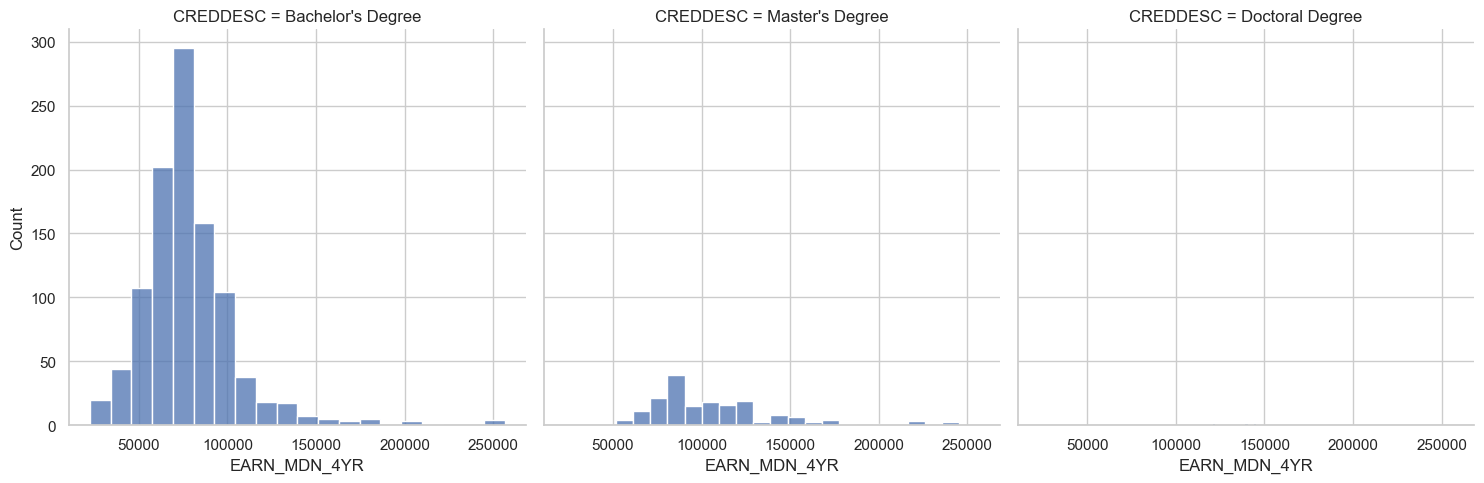

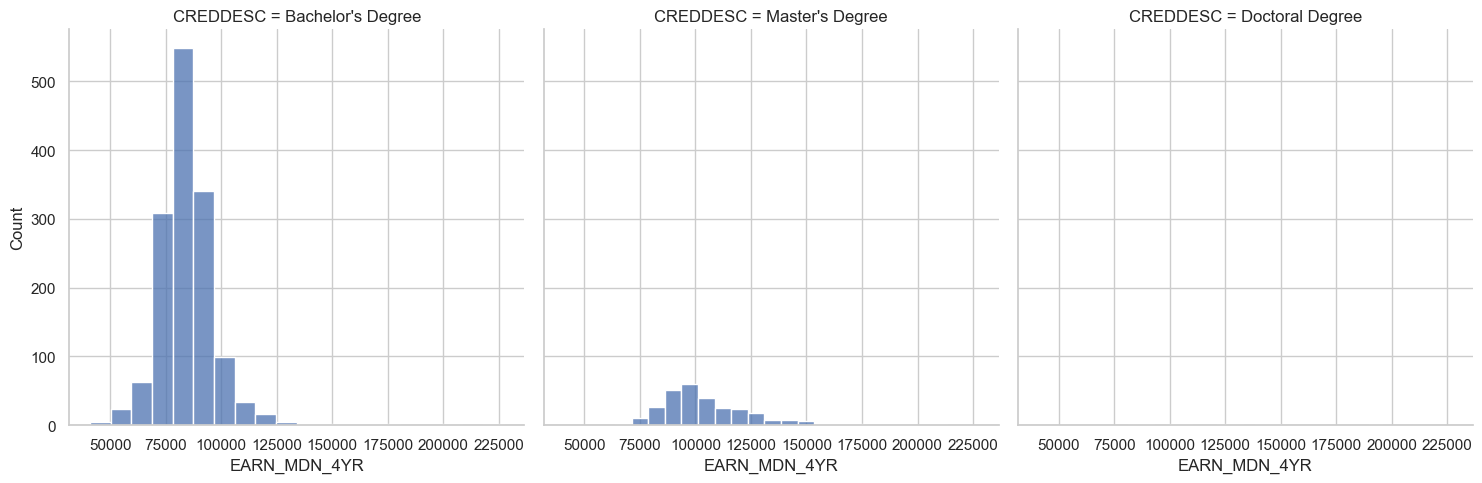

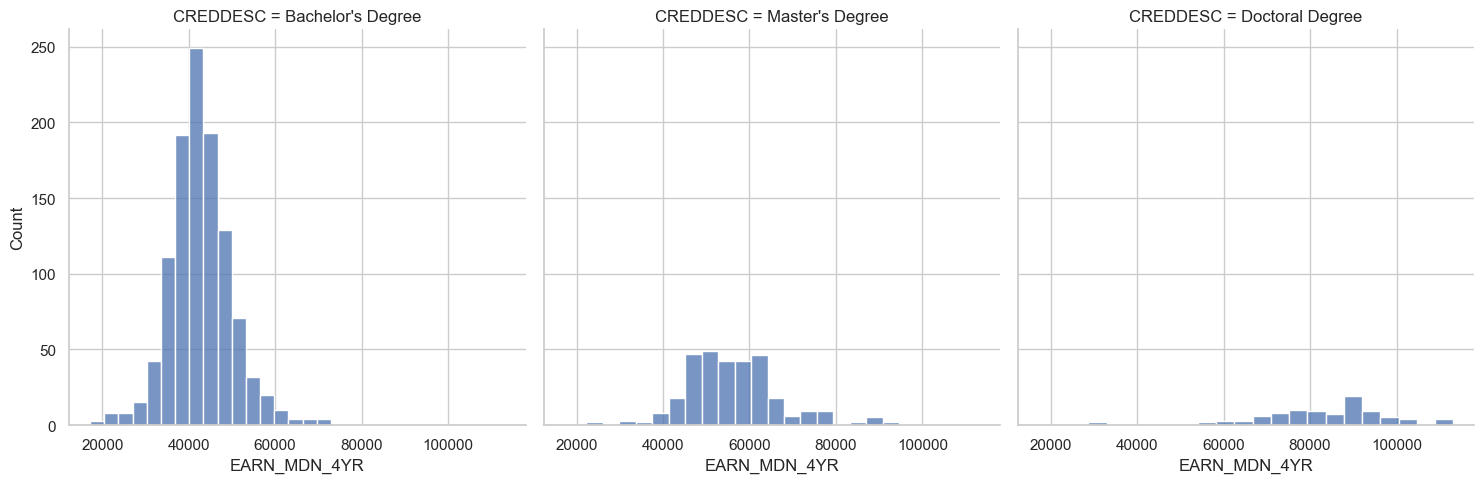

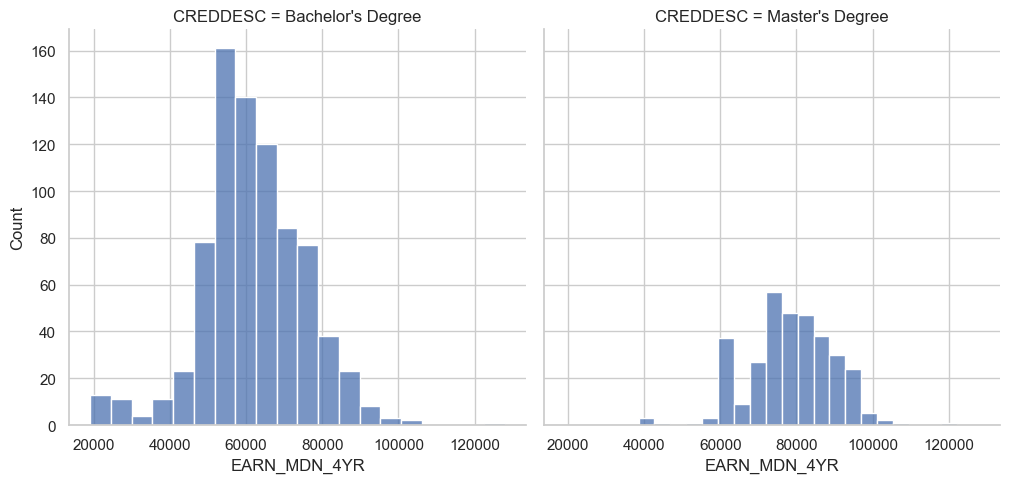

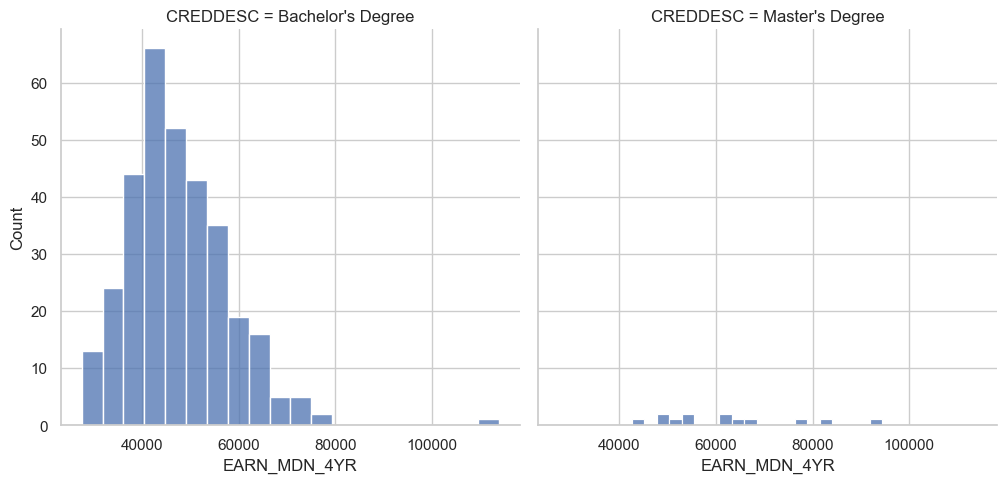

In [151]:
# make a distribution seperate graph for each major
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
# g = sns.FacetGrid(df_formatted, col="Major", col_wrap=2, height=5)
# g.map(sns.histplot, "EARN_MDN_4YR", bins=20)
# plt.show()
# only do a graph for the computer science major
# df_cs = df_formatted[df_formatted['Major'] == 'Computer Science']
# g = sns.FacetGrid(df_cs, col="CREDDESC", col_wrap=3, height=5)
# g.map(sns.histplot, "EARN_MDN_4YR", bins=20)
# plt.show()
for major in df_formatted['Major'].unique():
    df_major = df_formatted[df_formatted['Major'] == major]
    g = sns.FacetGrid(df_major, col="CREDDESC", col_wrap=3, height=5)
    g.map(sns.histplot, "EARN_MDN_4YR", bins=20)
    plt.show()

plt.show()

### Final Display
This graph shows how all of the distributions of each major fit together

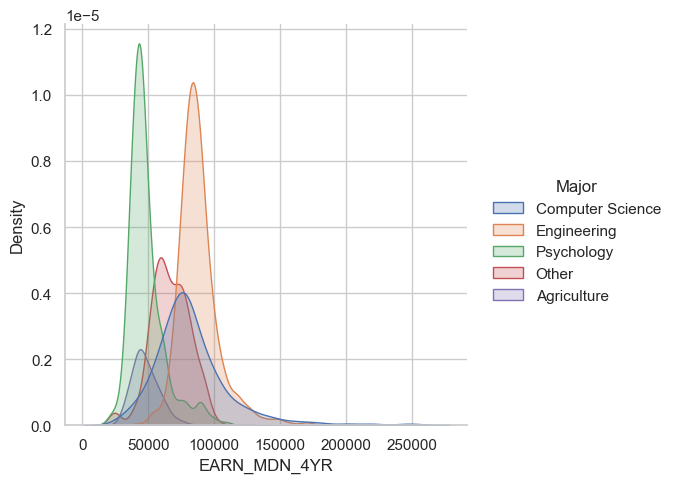

In [160]:
# make a distribution graph for all majors, but make the dist a line
sns.displot(df_formatted, x="EARN_MDN_4YR", hue="Major", kind="kde", fill=True)
plt.show()

## General Statistics
We are going to do basic stats to start

we have a bar graph showing how the mean and std of each group fit together.

again we show each degree just for display

In [102]:
# get stats of each major and degree
df_aggregated = df_formatted.groupby(['Major', 'CREDDESC']).agg({'EARN_MDN_4YR': ['count', 'mean', 'std', 'min', 'max', 'sum']}).reset_index()
# add commas to display
df_aggregated.columns = ['Major', 'Degree', 'Count', 'Mean', 'Std', 'Min', 'Max', 'Total']
display(df_aggregated)

,Major,Degree,Count,Mean,Std,Min,Max,Total
0,Agriculture,Bachelor's Degree,325,47511.766154,10432.757124,27481,113850,15441324
1,Agriculture,Master's Degree,13,62347.538462,15037.892886,42589,94420,810518
2,Computer Science,Bachelor's Degree,1031,78355.449079,26570.363304,22518,256539,80784468
3,Computer Science,Doctoral Degree,3,135553.666667,12784.123135,121097,145368,406661
4,Computer Science,Master's Degree,173,106886.965318,35810.444624,51661,245333,18491445
5,Engineering,Bachelor's Degree,1451,84579.912474,13367.665739,40869,227172,122725453
6,Engineering,Doctoral Degree,11,127351.636364,31890.660922,81388,195597,1400868
7,Engineering,Master's Degree,278,104536.946043,20066.333577,63805,213235,29061271
8,Other,Bachelor's Degree,797,61735.340025,13515.024753,19023,127971,49203066
9,Other,Master's Degree,334,78322.488024,11469.142191,38510,122129,26159711


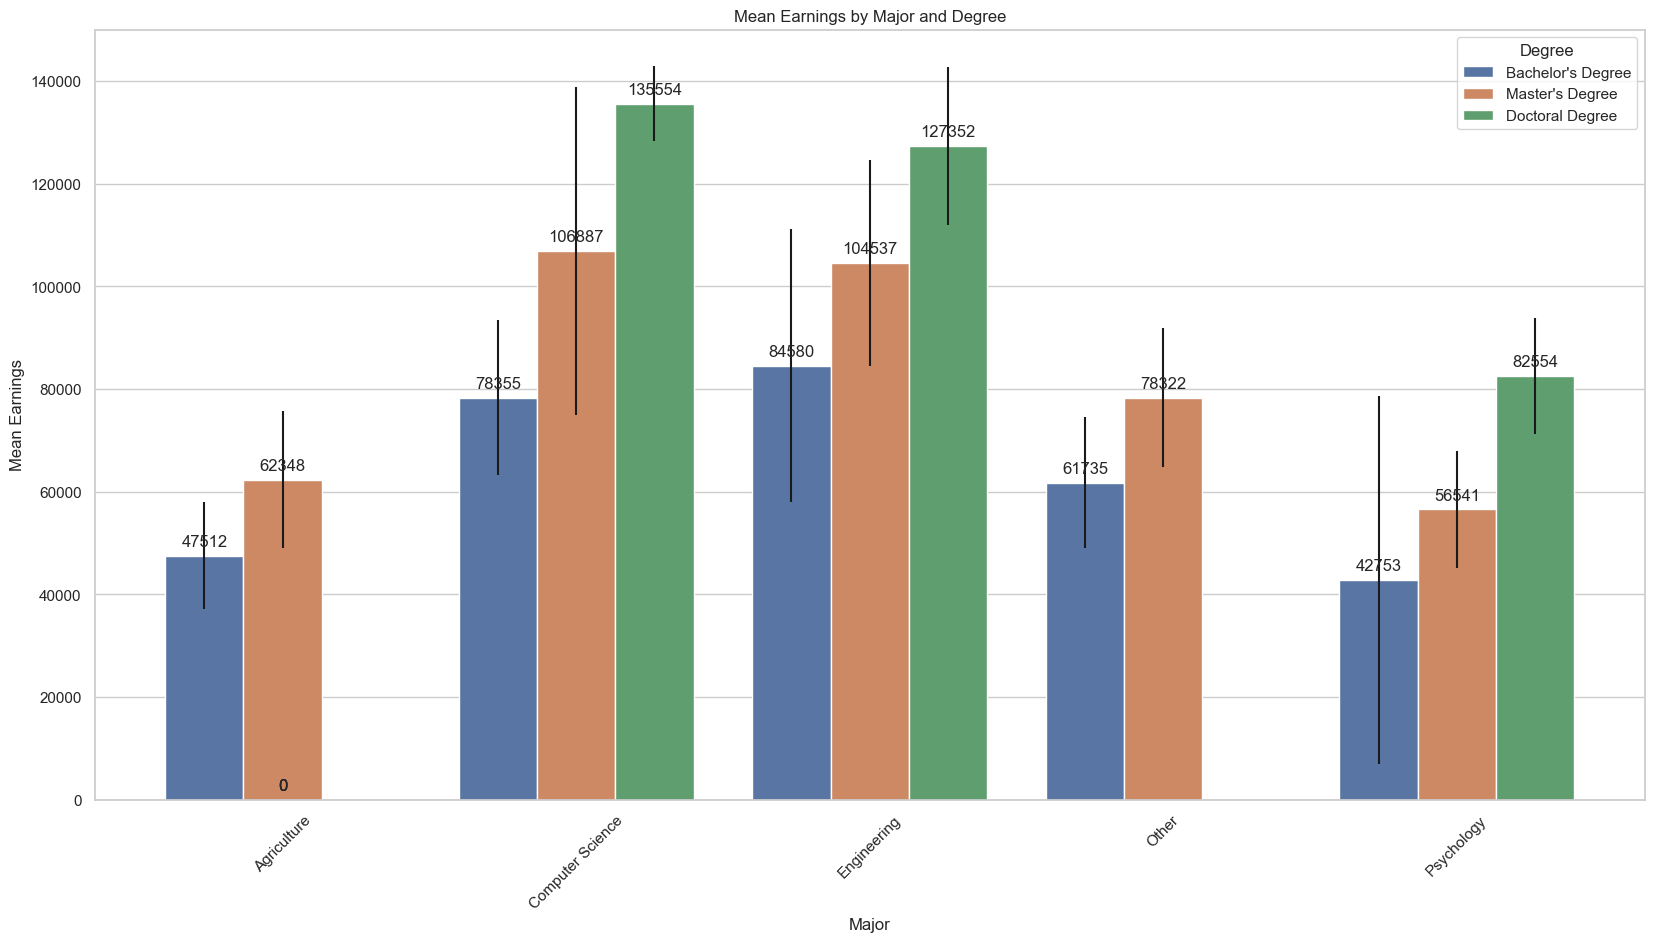

In [115]:
# create a graph to show the mean and error (std) of each group
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Major', y='Mean', hue='Degree', data=df_aggregated)

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords[:13], y=y_coords[:13], yerr=df_aggregated["Std"], fmt="none", c="k")

# show number above bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Mean Earnings by Major and Degree')
plt.ylabel('Mean Earnings')
plt.xlabel('Major')
plt.xticks(rotation=45)
plt.show()


$ H_0 : \mu_0 = \mu_1 = \mu_2 = \mu_3 = \mu_4 $

$ H_1 : \mu_0 \ne \mu_1 \ne \mu_2 \ne \mu_3 \ne \mu_4 $

We reject if all values are not about the same

## ANOVA
we are going to compute anova, to see if there is a noticable difference between each group

In [173]:
grand_mean = df_formatted['EARN_MDN_4YR'].mean()
sst = ((df_formatted['EARN_MDN_4YR'] - grand_mean) ** 2).sum()
print(f"{sst=}")

ssbs = []
for major in df_formatted['Major'].unique():
    df_major = df_formatted[df_formatted['Major'] == major]
    mean = df_major['EARN_MDN_4YR'].mean()
    ssb = len(df_major) * ((mean - grand_mean) ** 2)
    ssbs.append(ssb)
ssb = sum(ssbs)
print(f"{ssb=}")

ssw = sst - ssb
print(f"{ssw=}")

sst=3800072467940.371
ssb=1653179074302.0737
ssw=2146893393638.2974


In [174]:
msb = ssb / (len(df_formatted['Major'].unique()) - 1)
print(f"{msb=}")

msw = ssw / (len(df_formatted) - len(df_formatted['Major'].unique()))
print(f"{msw=}")

f = msb / msw
print(f"{f=}")

msb=413294768575.51843
msw=363080228.9258071
f=1138.301498261896


In [175]:
alpha = 0.05
from scipy.stats import f as f_dist
dfn = len(df_formatted['Major'].unique()) - 1
dfd = len(df_formatted) - len(df_formatted['Major'].unique())
f_critical = f_dist.ppf(1 - alpha, dfn, dfd)
print(f"{f_critical=}")

f_critical=2.3734345972712805


In [177]:
# compare f to f_critical
print(f"{'Reject' if f > f_critical else 'Accept'} null hypothesis")

Reject null hypothesis


### Findings
We reject the null hypothesis, proving that the groups are not similar enough

This proves are original theory that some groups get paid more than others depending on major

## goodness of fit
each group follows a normal distribution

we also beleive each group follows a normal distribution

Computer Science


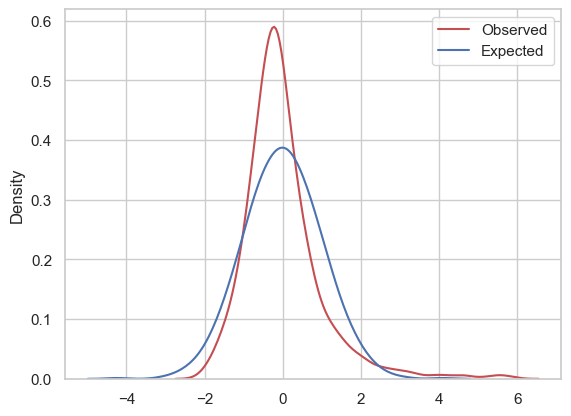

observerd[:5]=array([-2.01084113, -1.97103877, -1.8960202 , -1.8897268 , -1.8897268 ])
expected[:5]=[-4.2568614519955545, -3.098013958513604, -2.9223555438863227, -2.7909008199119048, -2.7002350691557124]
-1.1850531958747372
-0.4099636358057042
-0.3604504070569381
-0.2909865521640774
-0.243283873854742
-2.489737664756199
chi2=198.82674227682776
chi2_critical=1287.9031909636012
Engineering


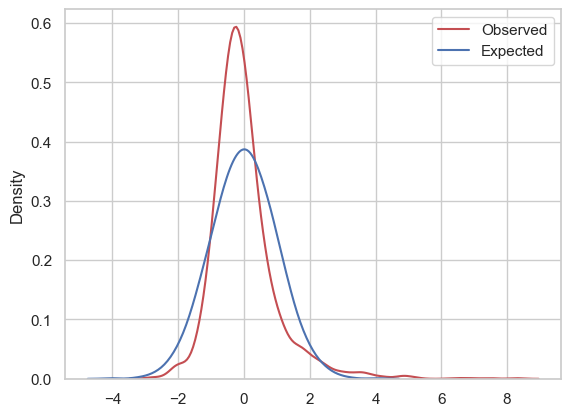

observerd[:5]=array([-2.80846002, -2.80846002, -2.48635236, -2.29159928, -2.20145677])
expected[:5]=[-4.067849276869678, -3.266832554601979, -3.0659078232418673, -2.932529712028884, -2.831843012370489]
-0.3899016879914689
-0.06431470749865732
-0.10955467482193385
-0.14008104162174087
-0.140327982532781
-0.8441800944665819
chi2=133.7356530211817
chi2_critical=1837.12818749842
Psychology


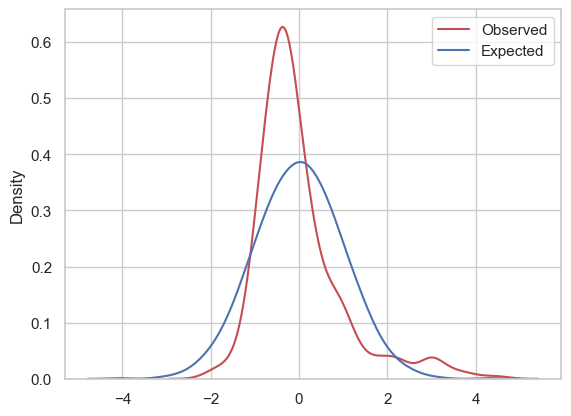

observerd[:5]=array([-2.24772956, -2.06833409, -2.01316345, -1.98903083, -1.97107675])
expected[:5]=[-4.084706245581915, -3.166316075532371, -3.0094672565566043, -2.8612867804563415, -2.7736599000515367]
-0.8261263211142179
-0.38074671116775044
-0.3298328901527389
-0.26590499328519573
-0.2322345716630438
-2.0348454873829467
chi2=18.339394427878375
chi2_critical=1592.2449928858916
Other


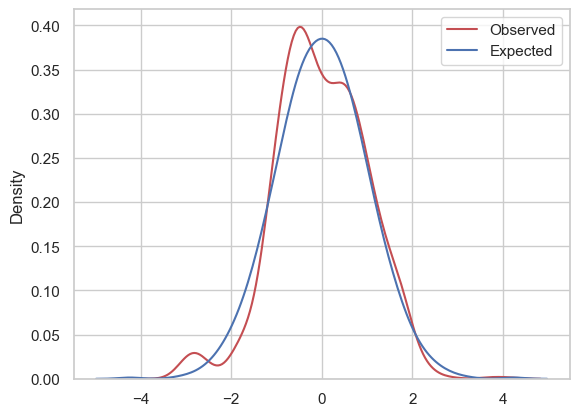

observerd[:5]=array([-3.17730357, -3.02975249, -3.02975249, -3.02975249, -3.02975249])
expected[:5]=[-4.240170086383176, -3.1515171085843297, -2.903909266760226, -2.7780311873866785, -2.6729002688730756]
-0.26642451029546044
-0.004704598421072025
-0.005453516382253808
-0.022808820262342995
-0.04764244629296314
-0.34703389165409243
chi2=-4.18696146463063
chi2_critical=1209.3158612065001
Agriculture


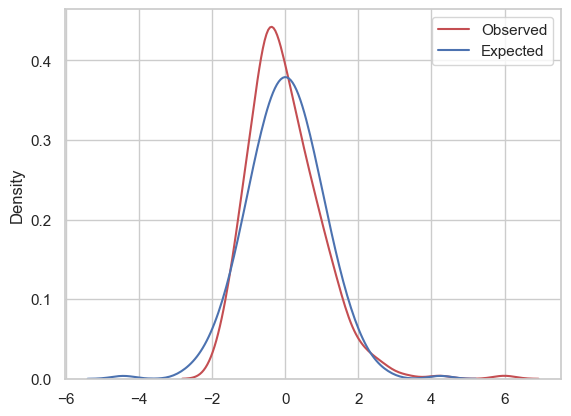

observerd[:5]=array([-1.87671394, -1.8751653 , -1.82351355, -1.65407398, -1.64769722])
expected[:5]=[-4.427621905485455, -2.764748672462573, -2.5405997430047216, -2.3848091552472517, -2.282953719537014]
-1.4696673737563541
-0.2862316528332197
-0.2023981162143455
-0.22390634555716635
-0.17676697528072105
-2.358970463641807
chi2=-3414.126265110146
chi2_critical=380.8093279832631


In [361]:
import numpy as np

def create_normal_distribution(n, mean=0, std_dev=1, min_val=0):
    # Calculate percentiles for equally spaced intervals
    percentiles = np.linspace(0, 100, n)
    # Convert percentiles to z-scores (quantiles of the standard normal distribution)
    z_scores = np.percentile(np.random.normal(0, 1, 100000), percentiles)
    # Scale z-scores to the desired mean and standard deviation
    normal_values = mean + std_dev * z_scores

    # convert all negs to 0
    # normal_values[normal_values < min_val] = min_val

    return normal_values.tolist()

for major in df_formatted['Major'].unique():
    print(major)
    observerd = df_formatted[df_formatted['Major'] == major]['EARN_MDN_4YR'].sort_values().tolist()
    # normalize the observed values
    observerd = (observerd - np.mean(observerd)) / np.std(observerd)

    # generate the expected values
    m = np.mean(observerd)#df_formatted[df_formatted['Major'] == major]['EARN_MDN_4YR'].mean()
    std = np.std(observerd)#df_formatted[df_formatted['Major'] == major]['EARN_MDN_4YR'].std()
    expected = create_normal_distribution(len(observerd), m, std, min_val=min(observerd))


    # display the expected and observed on a graph
    sns.kdeplot(observerd, color='r', label='Observed')
    sns.kdeplot(expected, color='b', label='Expected')
    plt.legend()
    plt.show()

    # show the work for the first 5 values
    print(f"{observerd[:5]=}")
    print(f"{expected[:5]=}")
    chis = []
    for i in range(5):
        print(f"{(observerd[i] - expected[i]) ** 2 / expected[i]}")
        chis.append((observerd[i] - expected[i]) ** 2 / expected[i])
    print(np.sum(chis))

    # get chi squared
    chi2 = np.sum((np.array(observerd) - np.array(expected)) ** 2 / np.array(expected))
    print(f"{chi2=}")
    
    # get the critical value
    from scipy.stats import chi2 as chi2_dist
    df = len(observerd) - 1
    alpha = 0.05
    chi2_critical = chi2_dist.ppf(1 - alpha, df)
    print(f"{chi2_critical=}")
    
    # break
    

### Findings
These graphs and $ \chi^2 $ values, show that our hypothesis is correct in that each group follows a normal distribution